In [3]:
import numpy as np
import pandas as pd
import cv2
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
import pywt



In [4]:
img = cv2.imread("C:/Users/BHUPESH P S/Desktop/Project 2/Model/Dataset/vijay/92407003.webp")
img.shape

(1600, 900, 3)

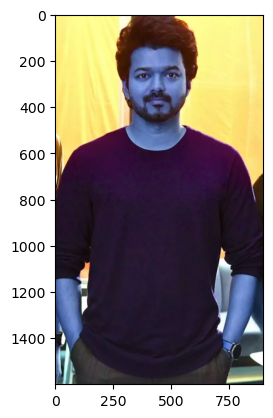

In [5]:
plt.imshow(img)

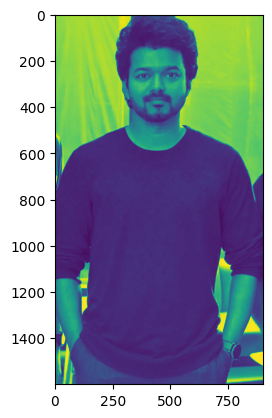

In [67]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray)

In [68]:
face_cascade=cv2.CascadeClassifier("./opencv/haarcascades/haarcascade_frontalface_default.xml")
eye_cascade = cv2.CascadeClassifier("./opencv/haarcascades/haarcascade_eye.xml")
faces = face_cascade.detectMultiScale(gray, 1.3,5)
faces

array([[275, 136, 326, 326]])

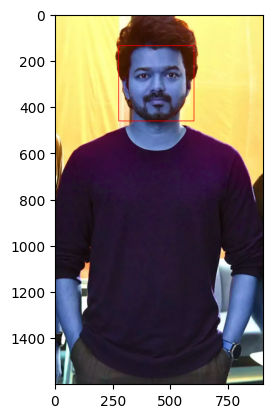

In [69]:
(x,y,w,h)=faces[0]
face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(face_img)

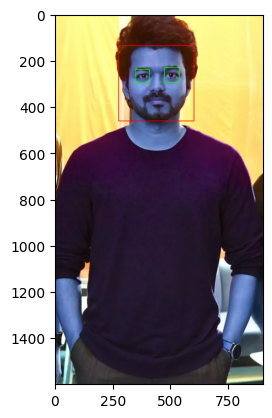

In [70]:
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)

plt.figure()
plt.imshow(face_img,cmap='gray')
plt.show()

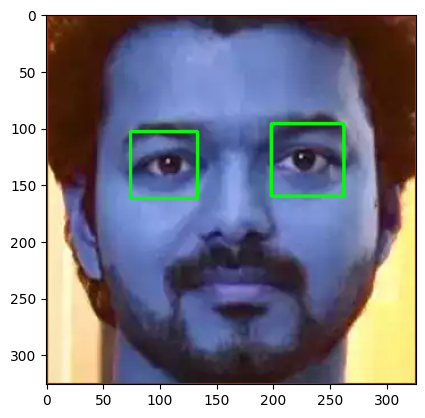

In [71]:
plt.imshow(roi_color,cmap='gray')

In [72]:
def get_crop_2eyes(img_path):
    img = cv2.imread(img_path)
    if(img is not None):
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        faces = face_cascade.detectMultiScale(gray, 1.3,5)
        for (x,y,w,h) in faces:
            roi_gray = gray[y:y+h, x:x+w]
            roi_color = img[y:y+h, x:x+w]
            eyes = eye_cascade.detectMultiScale(roi_gray)
            if len(eyes) >=2:
                return roi_color
        

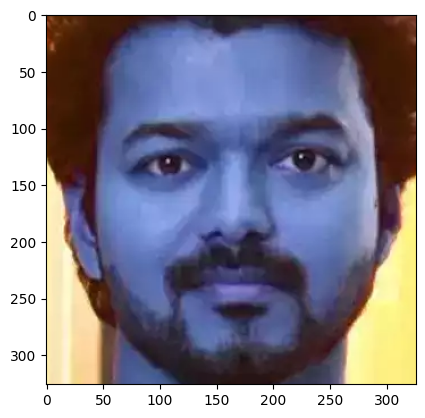

In [73]:
crop = get_crop_2eyes("C:/Users/BHUPESH P S/Desktop/Project 2/Model/Dataset/vijay/92407003.webp")
plt.imshow(crop)

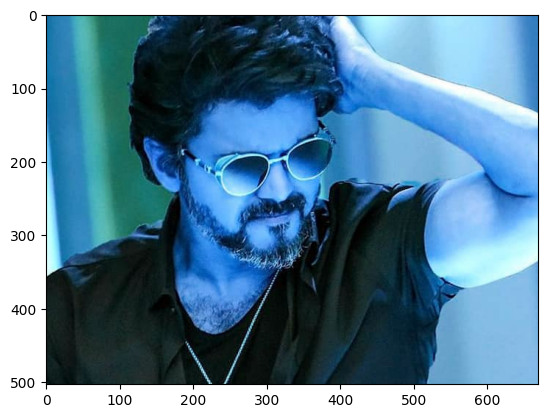

In [74]:
img_obst = cv2.imread('./Dataset/vijay/6f53d41cacec990523d34c06cfba927d1670058951902431_original.jpg')
plt.imshow(img_obst)

In [75]:
path_to_data = "./Dataset/"
path_to_crop = './Dataset/cropped/'
import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)
img_dirs


['./Dataset/Ajith',
 './Dataset/dhanush',
 './Dataset/sivakarthikeyan',
 './Dataset/suriya',
 './Dataset/vijay']

In [76]:
import shutil
if os.path.exists(path_to_crop):
    shutil.rmtree(path_to_crop)
os.mkdir(path_to_crop)

In [77]:
cropped_img_dirs = []
celeb_files = {}

In [78]:

for img_dir in img_dirs:
    count = 1
    celeb_name = img_dir.split('/')[-1]
    celeb_files[celeb_name] = []

    for entry in os.scandir(img_dir):
        roi_color = get_crop_2eyes(entry.path)
        if roi_color is not None:
            crop_folder = path_to_crop + celeb_name
            if not os.path.exists(crop_folder):
                os.makedirs(crop_folder)
                cropped_img_dirs.append(crop_folder)
                print("Generating Cropped images in folder:",crop_folder)

            cropped_file_name = celeb_name + str(count) + ".png"
            cropped_file_path = crop_folder + "/" + cropped_file_name

            cv2.imwrite(cropped_file_path,roi_color)
            celeb_files[celeb_name].append(cropped_file_path)
            count += 1



Generating Cropped images in folder: ./Dataset/cropped/Ajith
Generating Cropped images in folder: ./Dataset/cropped/dhanush
Generating Cropped images in folder: ./Dataset/cropped/sivakarthikeyan
Generating Cropped images in folder: ./Dataset/cropped/suriya
Generating Cropped images in folder: ./Dataset/cropped/vijay


In [79]:
def w2d(img, mode='haar', level=1):
    imArray = img
    imArray = cv2.cvtColor(imArray,cv2.COLOR_RGB2GRAY)
    imArray = np.float32(imArray)
    imArray /=255;
    coeffs=pywt.wavedec2(imArray,mode,level=level)
    coeffs_H=list(coeffs)
    coeffs_H[0] *= 0;
    imArray_H=pywt.waverec2(coeffs_H,mode);
    imArray_H *= 255;
    imArray_H = np.uint8(imArray_H)
    return imArray_H

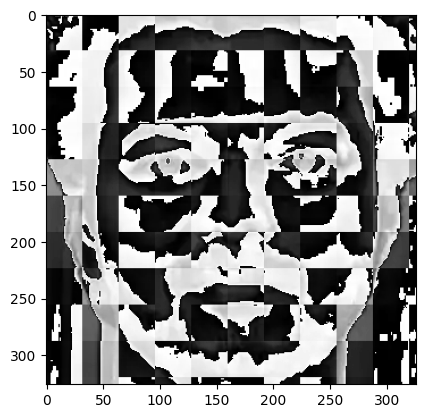

In [80]:
im_har = w2d(crop,'db1',5)
plt.imshow(im_har,cmap='gray')

In [81]:
celeb_files

{'Ajith': ['./Dataset/cropped/Ajith/Ajith1.png',
  './Dataset/cropped/Ajith/Ajith2.png',
  './Dataset/cropped/Ajith/Ajith3.png',
  './Dataset/cropped/Ajith/Ajith4.png',
  './Dataset/cropped/Ajith/Ajith5.png',
  './Dataset/cropped/Ajith/Ajith6.png',
  './Dataset/cropped/Ajith/Ajith7.png',
  './Dataset/cropped/Ajith/Ajith8.png',
  './Dataset/cropped/Ajith/Ajith9.png',
  './Dataset/cropped/Ajith/Ajith10.png',
  './Dataset/cropped/Ajith/Ajith11.png',
  './Dataset/cropped/Ajith/Ajith12.png',
  './Dataset/cropped/Ajith/Ajith13.png',
  './Dataset/cropped/Ajith/Ajith14.png',
  './Dataset/cropped/Ajith/Ajith15.png',
  './Dataset/cropped/Ajith/Ajith16.png',
  './Dataset/cropped/Ajith/Ajith17.png',
  './Dataset/cropped/Ajith/Ajith18.png',
  './Dataset/cropped/Ajith/Ajith19.png',
  './Dataset/cropped/Ajith/Ajith20.png',
  './Dataset/cropped/Ajith/Ajith21.png',
  './Dataset/cropped/Ajith/Ajith22.png',
  './Dataset/cropped/Ajith/Ajith23.png',
  './Dataset/cropped/Ajith/Ajith24.png',
  './Dataset/cro

In [82]:
class_dict={}
count = 0
for celeb_name in celeb_files.keys():
    class_dict[celeb_name]=count
    count+=1
class_dict

{'Ajith': 0, 'dhanush': 1, 'sivakarthikeyan': 2, 'suriya': 3, 'vijay': 4}

In [83]:
X=[]
y=[]
for celeb_name, train_files in celeb_files.items():
    for train_image in train_files:
        img = cv2.imread(train_image)
        if img is None:
            continue
        scalled_raw_img =cv2.resize(img,(32,32))
        img_har=w2d(img,'db1',5)
        scalled_img_har = cv2.resize(img_har,(32,32))
        combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
        X.append(combined_img)
        y.append(class_dict[celeb_name])

In [84]:
X = np.array(X).reshape(len(X),4096).astype(float)
X.shape

(251, 4096)

In [85]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [86]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0)
pipe = Pipeline([('scaler',StandardScaler()),('svc',SVC(kernel='rbf',C=10))])
pipe.fit(X_train, y_train)
pipe.score(X_test,y_test)

0.746031746031746

In [87]:
print(classification_report(y_test,pipe.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      0.57      0.73         7
           1       0.73      0.67      0.70        12
           2       0.71      0.75      0.73        16
           3       0.75      0.88      0.81        17
           4       0.73      0.73      0.73        11

    accuracy                           0.75        63
   macro avg       0.78      0.72      0.74        63
weighted avg       0.76      0.75      0.74        63



In [88]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [94]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}

In [106]:
scores = []
best_estimator = {}
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf = GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False, error_score="raise")
    clf.fit(X_train,y_train)
    scores.append({
        'model': algo,
        'best_scores': clf.best_score_,
        'best_params': clf.best_params_
            })
    best_estimator[algo] = clf.best_estimator_

df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
    

In [108]:
best_estimator

{'svm': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('svc',
                  SVC(C=1, gamma='auto', kernel='linear', probability=True))]),
 'random_forest': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier',
                  RandomForestClassifier(n_estimators=10))]),
 'logistic_regression': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression',
                  LogisticRegression(C=5, solver='liblinear'))])}

In [109]:
best_estimator['svm'].score(X_test,y_test)

0.746031746031746

In [110]:
best_estimator['random_forest'].score(X_test,y_test)

0.47619047619047616

In [111]:
best_estimator['logistic_regression'].score(X_test,y_test)

0.7777777777777778

In [112]:
best_clf = best_estimator['svm']


Text(95.72222222222221, 0.5, 'Truth')

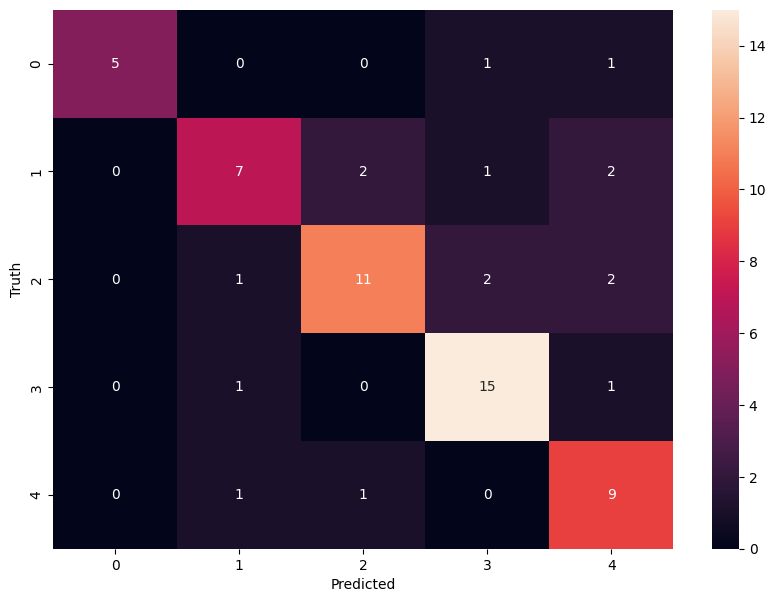

In [113]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, best_clf.predict(X_test))

import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [114]:
class_dict

{'Ajith': 0, 'dhanush': 1, 'sivakarthikeyan': 2, 'suriya': 3, 'vijay': 4}

In [115]:
import joblib
joblib.dump(best_clf, 'save_model.pkl')

['save_model.pkl']

In [116]:
import json
with open("class_dictionary.json","w") as f:
    f.write(json.dumps(class_dict))